In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('data_1.csv', delimiter=';')
data["rating"] = data['rating'].apply(lambda x: x.replace(',','.'))
data["price"] = data['price'].apply(lambda x: x.replace(',','.'))
data["price_per_square_meter"] = data['price_per_square_meter'].apply(lambda x: x.replace(',','.'))
data["count_infs"] = data['count_infs'].apply(lambda x: x.replace(',','.'))
data["quadrature"] = data['quadrature'].apply(lambda x: x.replace(',','.'))

In [3]:
data["rating"] = data['rating'].astype('float64')
data["price"] = data['price'].astype('float64')
data["price_per_square_meter"] = data['price_per_square_meter'].astype('float64')
data["count_infs"] = data['count_infs'].astype('float64')
data["quadrature"] = data['quadrature'].astype('float64')

In [4]:
display(data.head(), data.tail())

,name,rating,price,price_per_square_meter,infrastructure,count_infs,type_of_building,quadrature,tag,floor
0,БумБараш,4.6,975000.0,11170.94,"['коммунальные службы (пожарная станция, ЖЭК)'...",4.0,Здание старше 2008 года,87.28,Ресторан,11
1,Пиноккио Djan,4.6,900000.0,13194.55,"['наличие зеленых насаждений (парки, скверы)',...",8.0,Здание не старше 2018 года,68.21,Ресторан,16
2,На дровах,4.5,200000.0,2389.20,"['детские сады и школы:', 'коммунальные службы...",3.0,Старое здание,83.71,Ресторан,1
3,Барин,4.5,300000.0,3129.56,"['коммунальные службы (пожарная станция, ЖЭК)'...",4.0,Старое здание,95.86,Ресторан европейской кухни,5
4,Катенька-Катюша,4.7,475000.0,4737.21,"['остановки общественного транспорта', 'коммун...",7.0,Здание не старше 2018 года,100.27,Ресторан русской кухни,7


,name,rating,price,price_per_square_meter,infrastructure,count_infs,type_of_building,quadrature,tag,floor
252,Уральский банк реконструкции и развития,2.1,775000.0,6518.08,"['детские сады и школы:', 'остановки обществен...",2.0,Здание старше 2008 года,118.90,Банк,6
253,Банк Русский Стандарт,2.6,500000.0,3685.68,"['остановки общественного транспорта', 'спорти...",8.0,Новое здание,135.66,Банк,3
254,Банк Авангард,3.0,125000.0,2402.46,"['спортивные площадки', 'больницы и поликлиник...",3.0,Старое здание,52.03,Банк,12
255,ВНЕШФИНБАНК,3.5,150000.0,5778.12,"['коммунальные службы (пожарная станция, ЖЭК)']",1.0,Здание не старше 2018 года,25.96,Банк,1
256,Альфа-Банк,3.6,750000.0,12023.08,['рынок и магазины с товарами первой необходим...,8.0,Новое здание,62.38,Банк,15


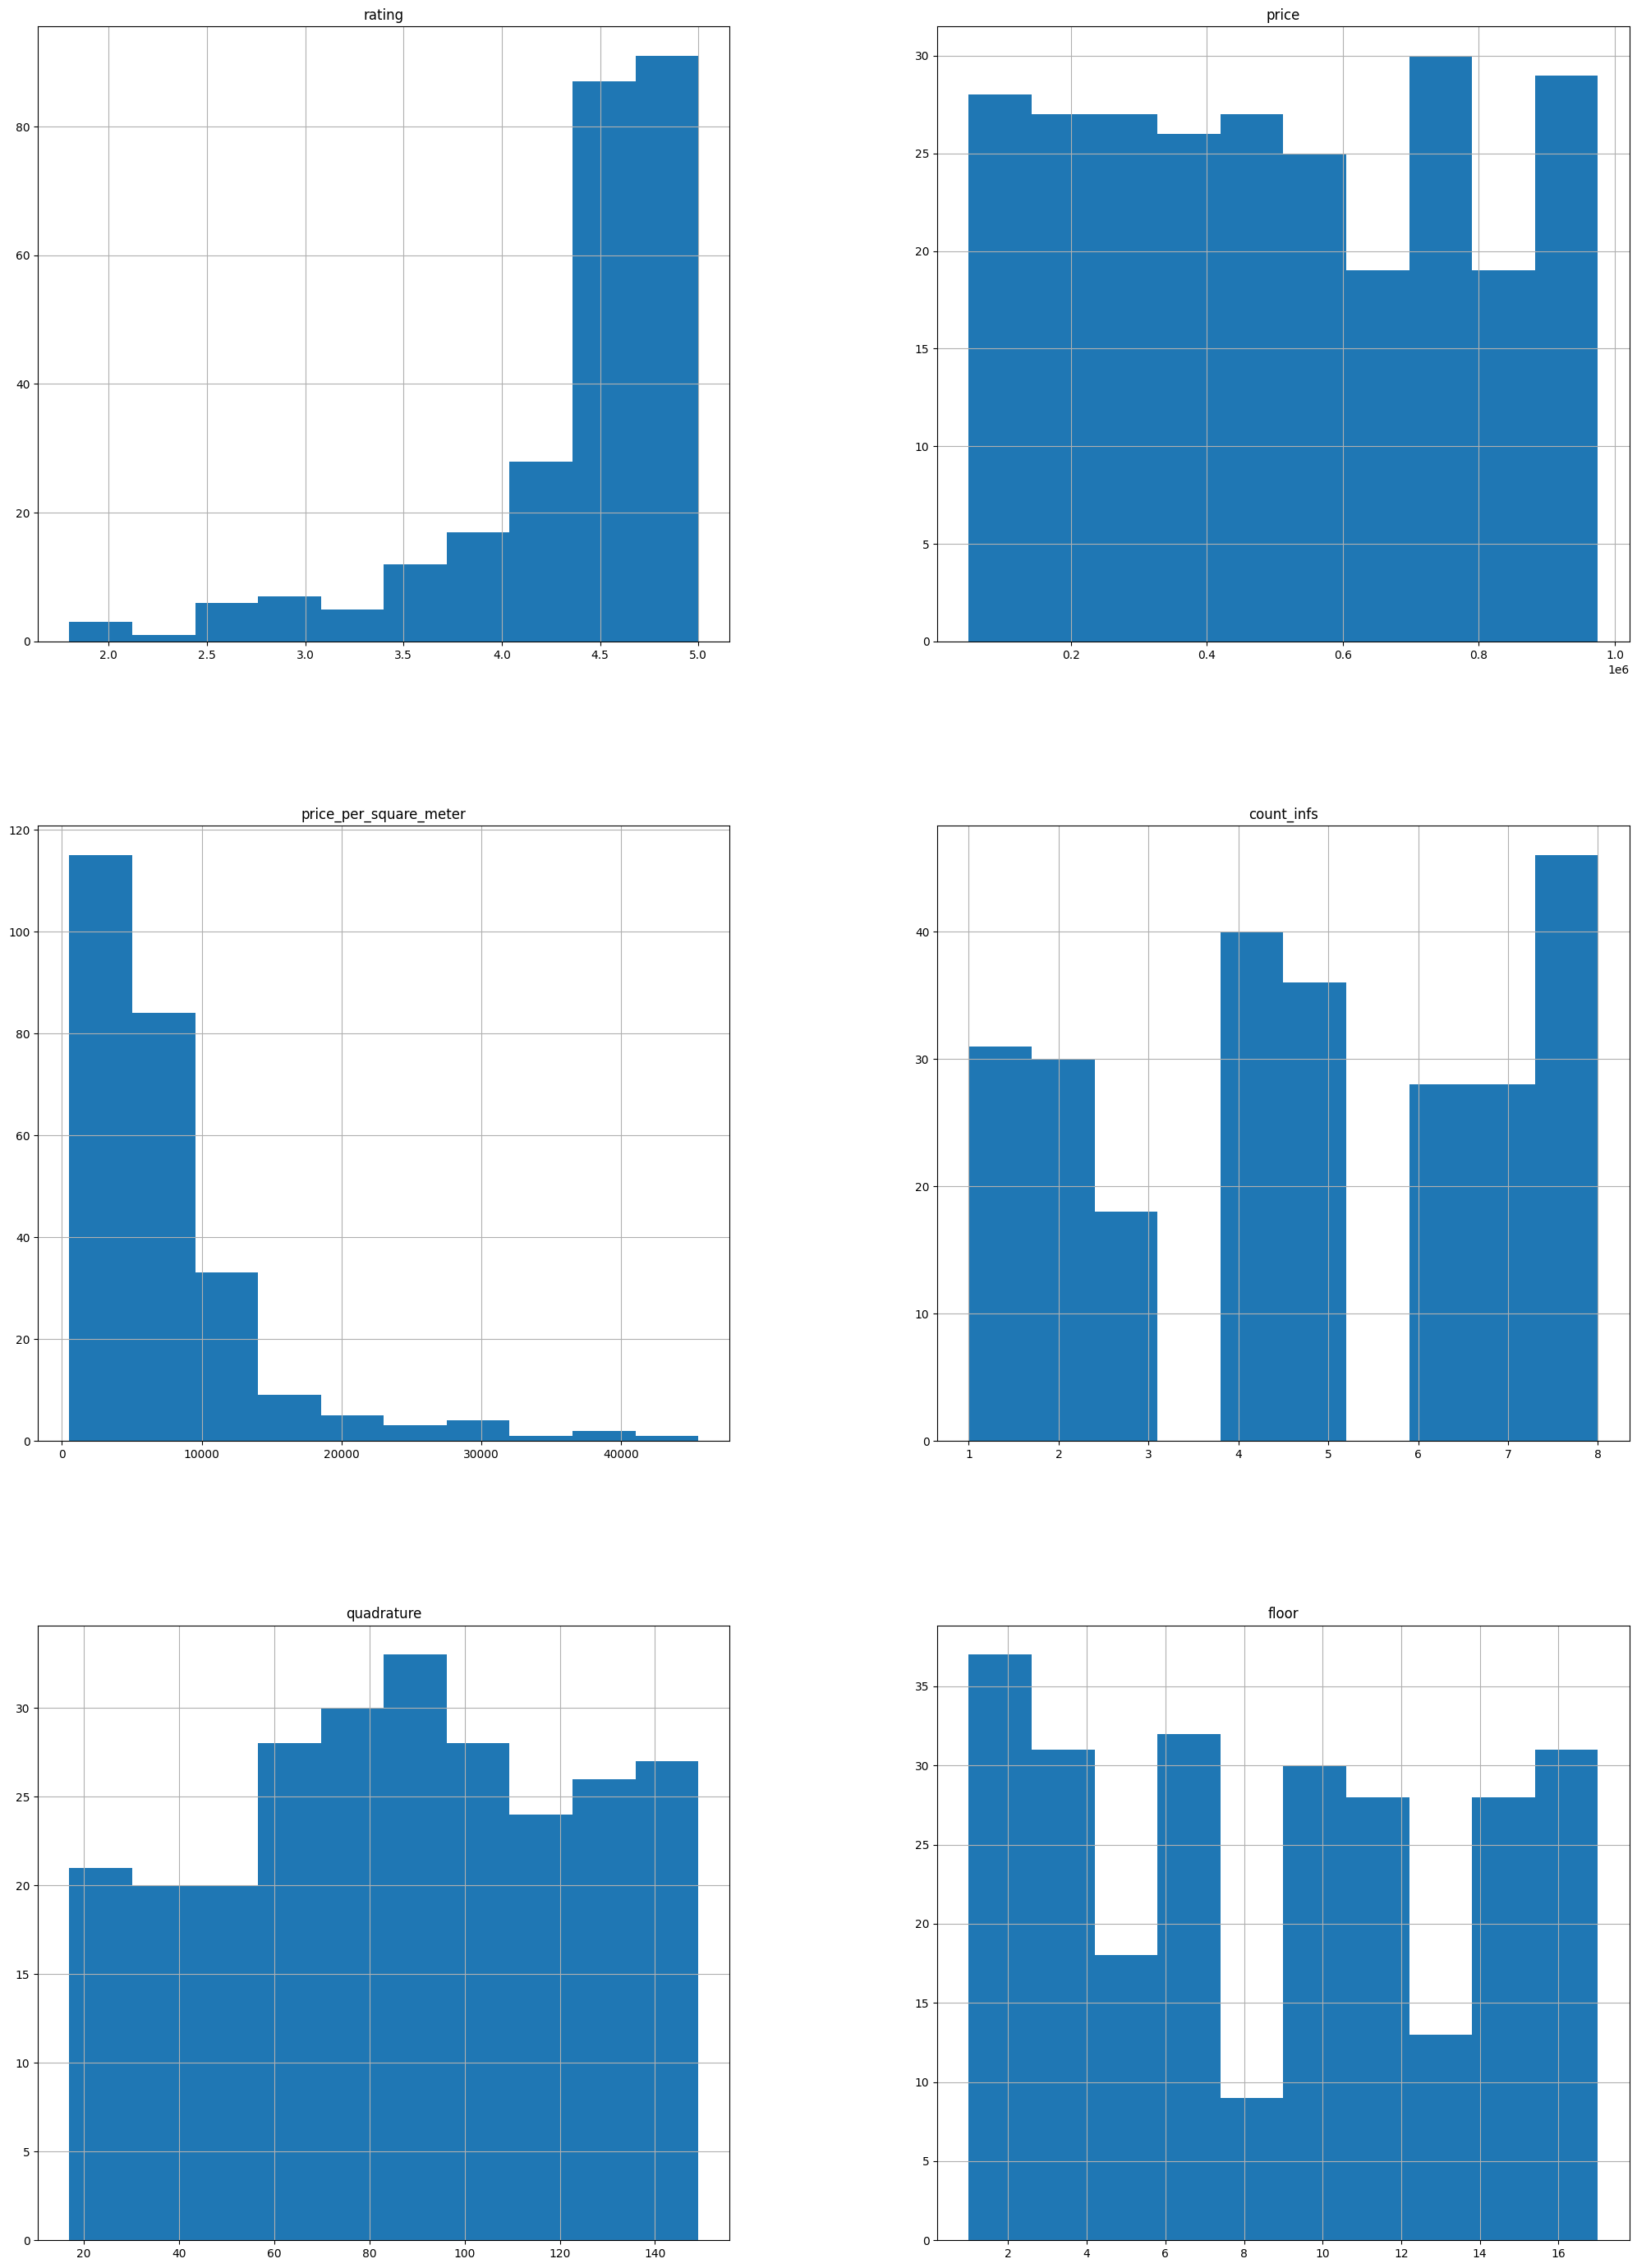

In [5]:
data.hist(figsize=(25, 35));

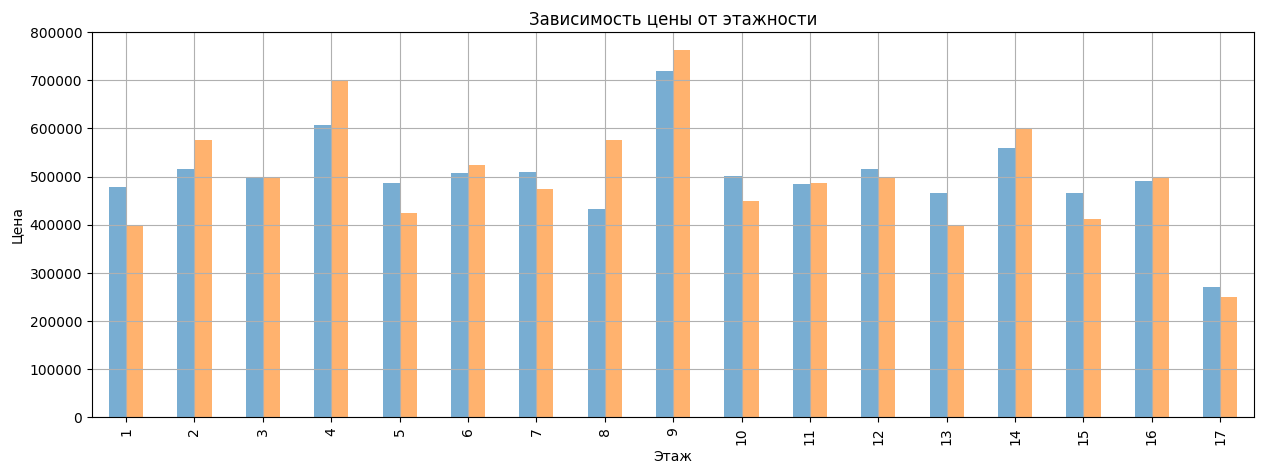

In [10]:
data.pivot_table(index=['floor'], values='price', aggfunc=['mean', 'median']) \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,5), title='Зависимость цены от этажности',legend = False)

plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

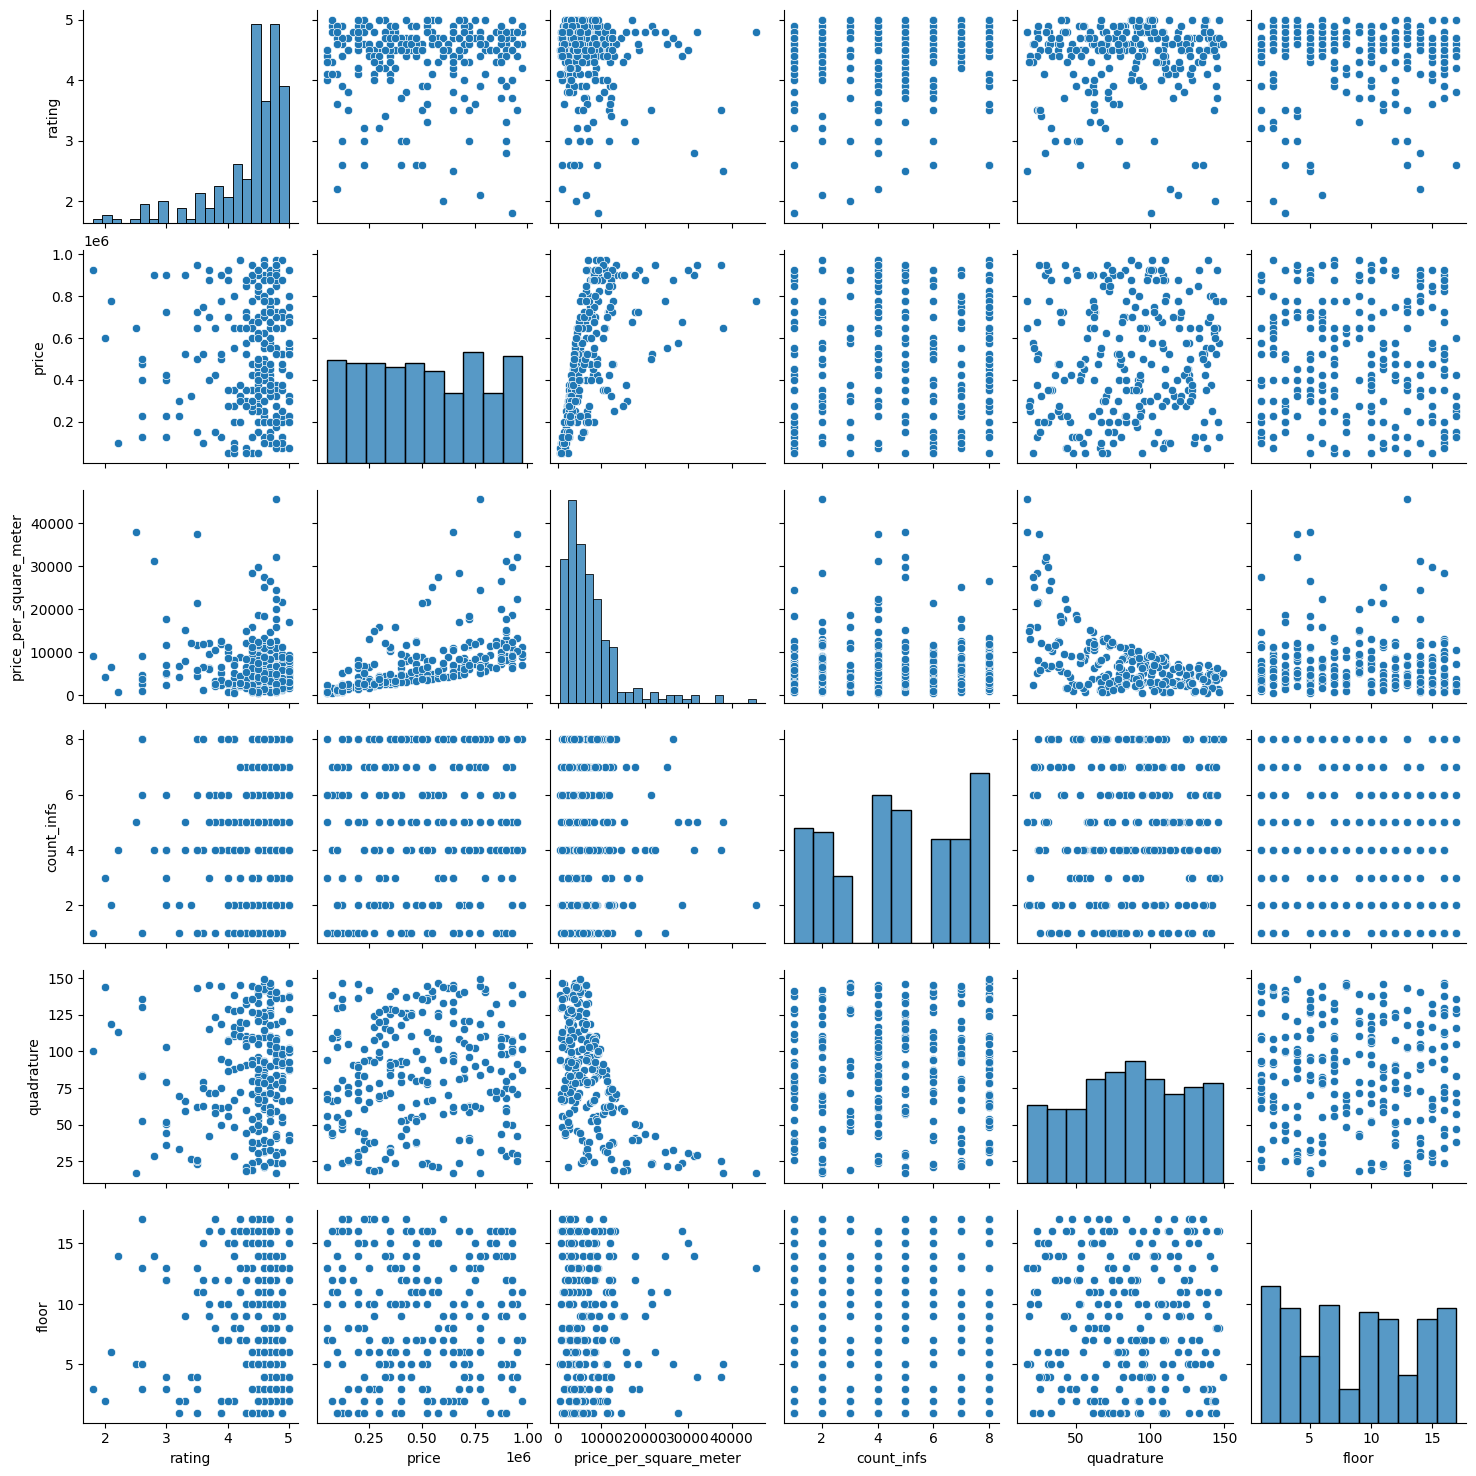

In [7]:
sns.pairplot(data)

In [8]:
print('Максимальная цена за квадрат:', data.price_per_square_meter.max())
print('Средняя цена за квадрат:', data.price_per_square_meter.mean())
print('Медианная цена за квадрат:', data.price_per_square_meter.median())
print('Минимальная цена за квадрат:', data.price_per_square_meter.min())

Максимальная цена за квадрат: 45534.67
Средняя цена за квадрат: 7467.13513618677
Медианная цена за квадрат: 5658.89
Минимальная цена за квадрат: 530.11


In [9]:
data['type_of_building'].value_counts()

type_of_building
Старое здание                 75
Здание старше 2008 года       68
Здание не старше 2018 года    60
Новое здание                  54
Name: count, dtype: int64

In [55]:
data['tag'].value_counts()

tag
Салон красоты                 95
Банк                          20
Кафе                          20
Агентство недвижимости        20
Аптека                        19
Медицинская клиника           15
Мужская парикмахерская        15
Ресторан                      14
Отель                          7
3 звезды                       6
Медицинский центр              5
4 звезды                       5
Парикмахерская                 4
Маникюр и педикюр              4
Ресторан европейской кухни     2
Ресторан русской кухни         2
5 звезд                        2
Мясной ресторан                1
Семейный ресторан              1
Name: count, dtype: int64

In [56]:
print('Анализ общей площади')
print(data.quadrature.describe())
print('-' * 35)

Анализ общей площади
count    257.000000
mean      85.948016
std       36.348752
min       17.020000
25%       59.070000
50%       87.680000
75%      115.480000
max      149.090000
Name: quadrature, dtype: float64
-----------------------------------


Text(0.5, 1.0, 'Квадратура')

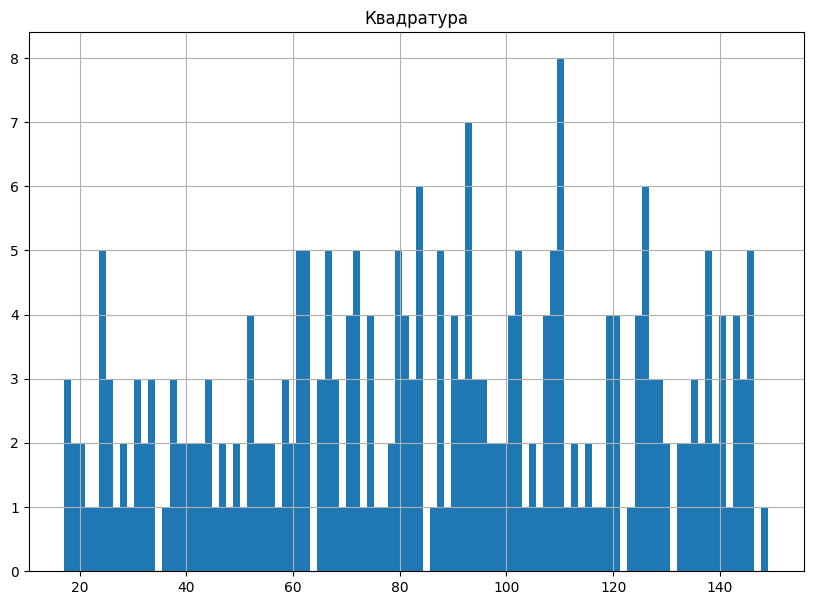

In [14]:
data.hist('quadrature', bins=100, figsize=(10,7))
plt.title('Квадратура')

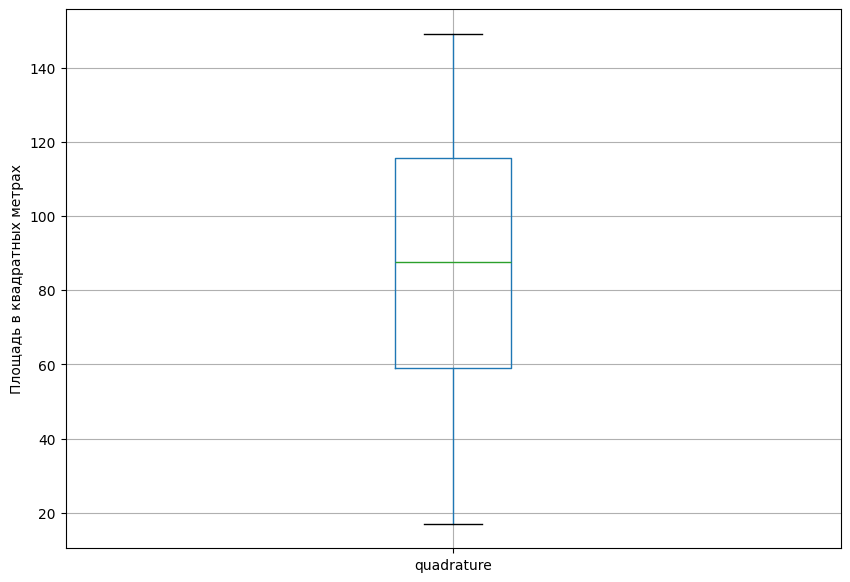

In [22]:
data.boxplot(column=['quadrature'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Диаграмма размаха цены предложений


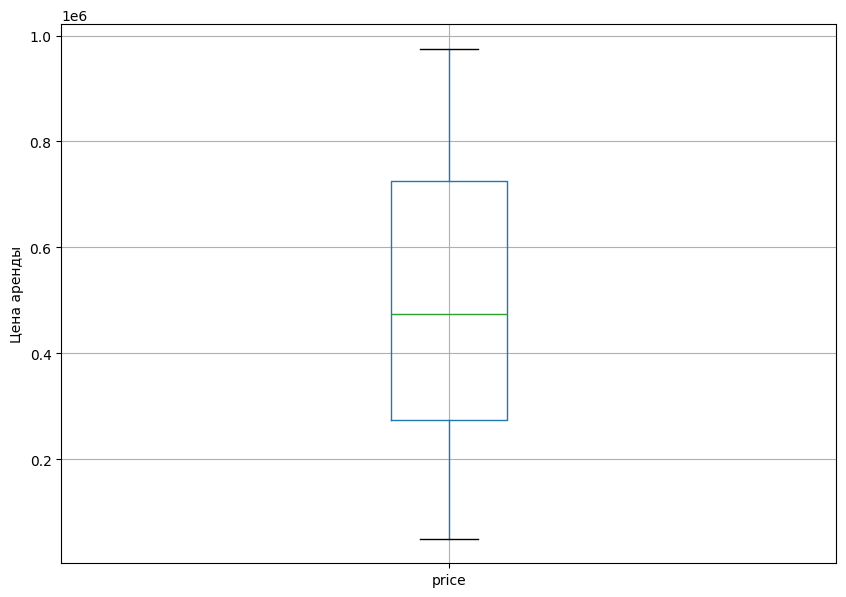

Text(0.5, 1.0, 'Цена')

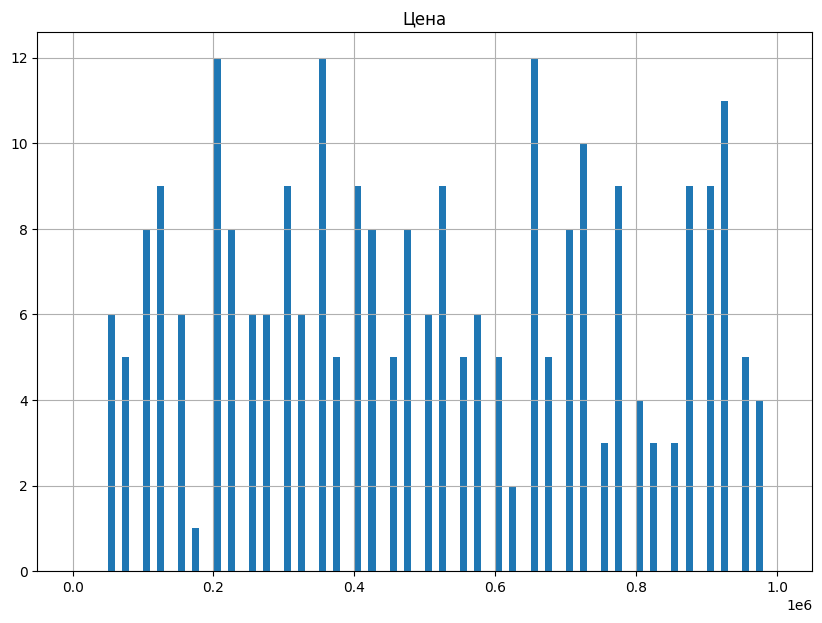

In [30]:
print('Диаграмма размаха цены предложений')
data.boxplot('price', figsize=(10,7))
plt.ylabel('Цена аренды')
plt.show()
data.hist('price', bins=100, range=(0,1e+06), figsize=(10,7))
plt.title('Цена')

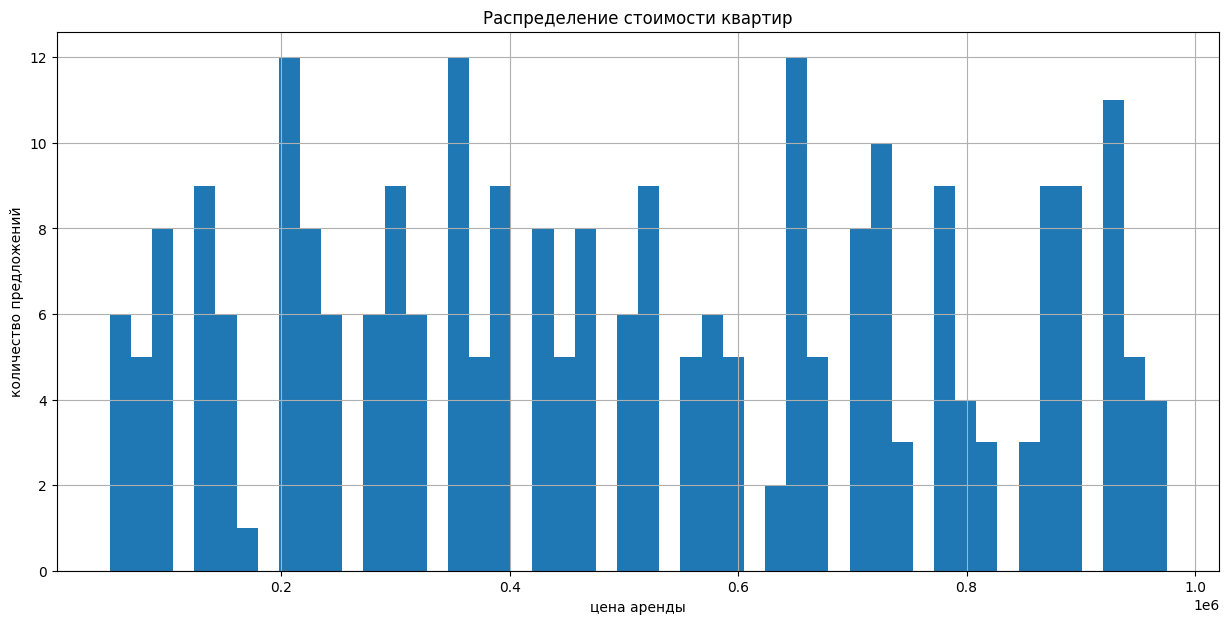

In [24]:
data.plot(kind='hist', y='price', title='Распределение стоимости квартир',grid=True, bins=50, figsize=(15,7),legend = False)
plt.ylabel('количество предложений')
plt.xlabel('цена аренды')
plt.show()

In [79]:
data.floor.describe()

count    257.000000
mean       8.657588
std        5.032654
min        1.000000
25%        4.000000
50%        9.000000
75%       13.000000
max       17.000000
Name: floor, dtype: float64

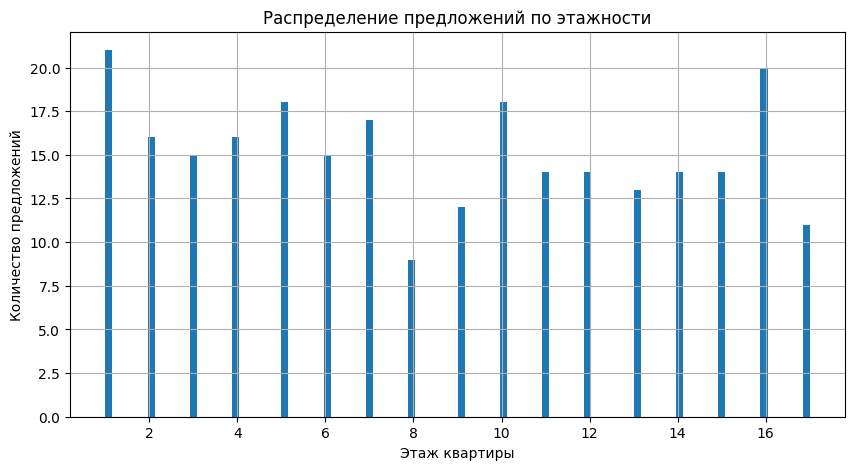

In [25]:
data.plot(kind='hist',y='floor',grid=True, bins=100, figsize=(10,5), \
        title='Распределение предложений по этажности',legend = False)
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

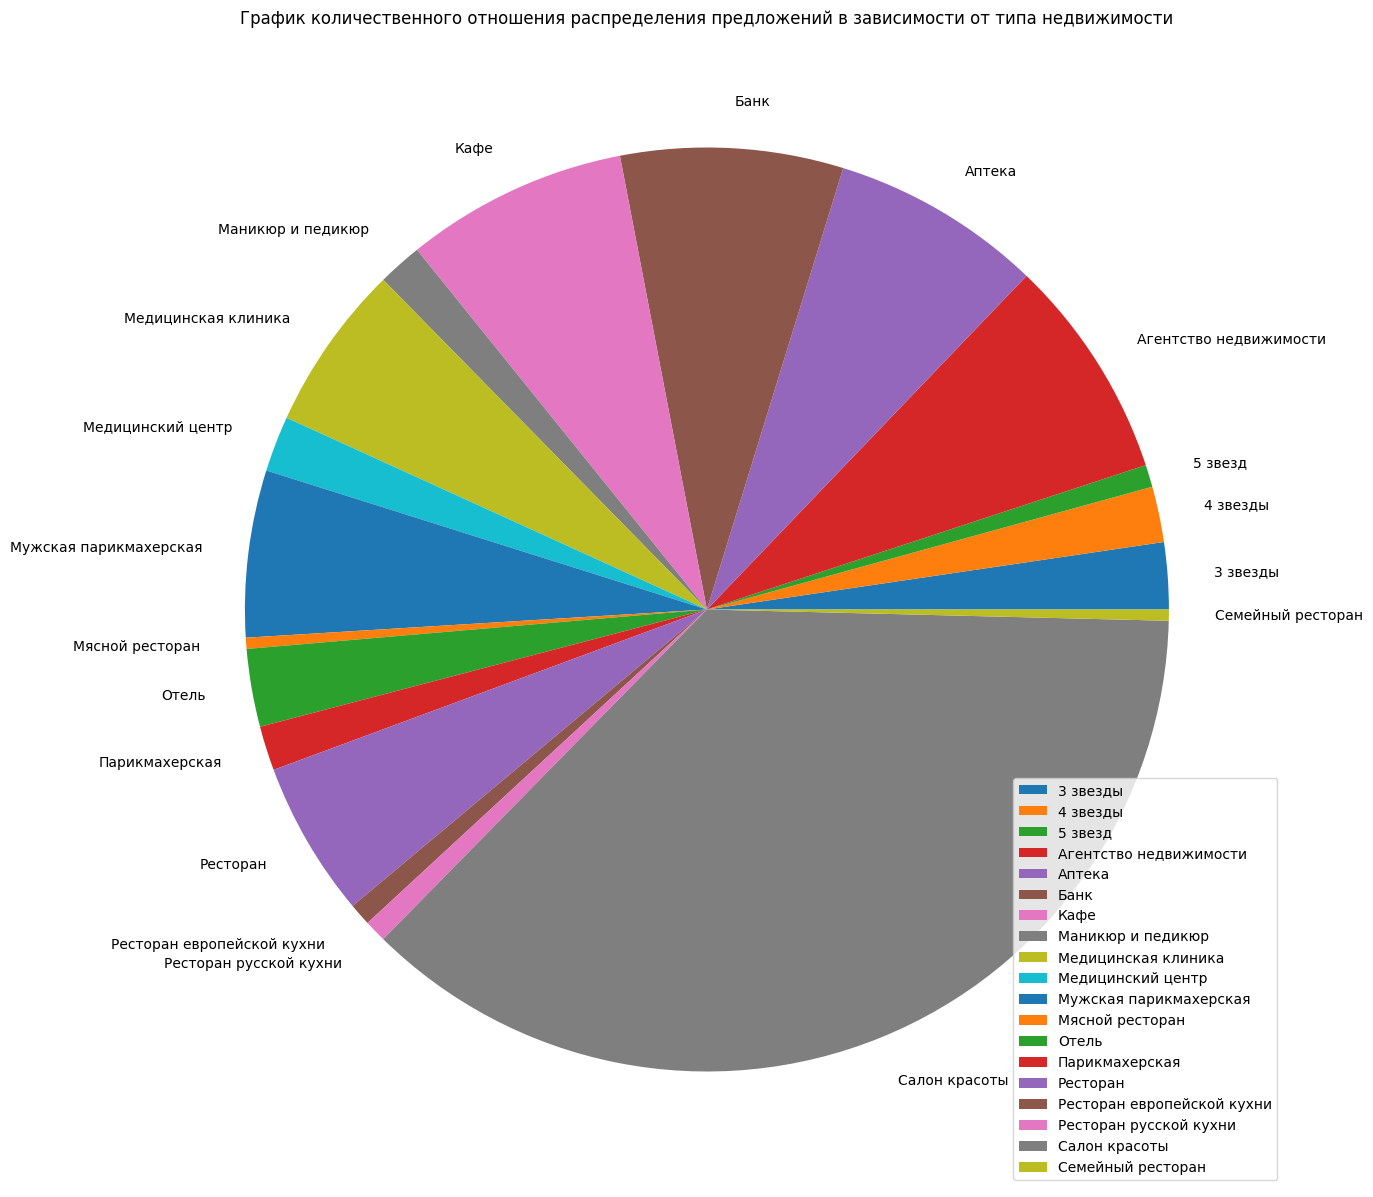

In [86]:
data.pivot_table(index='tag',values='price',aggfunc='count') \
  .plot.pie(y='price', figsize=(50,15), label='', title='График количественного отношения распределения предложений в зависимости от типа недвижимости')

plt.show()

In [27]:
data_1 = data.pivot_table(index='price', values=['floor','count_infs'])
data_1.reset_index().head()

,price,count_infs,floor
0,50000.0,4.833333,9.666667
1,75000.0,4.400000,9.600000
2,100000.0,3.375000,9.875000
3,125000.0,3.888889,10.333333
4,150000.0,4.666667,10.333333


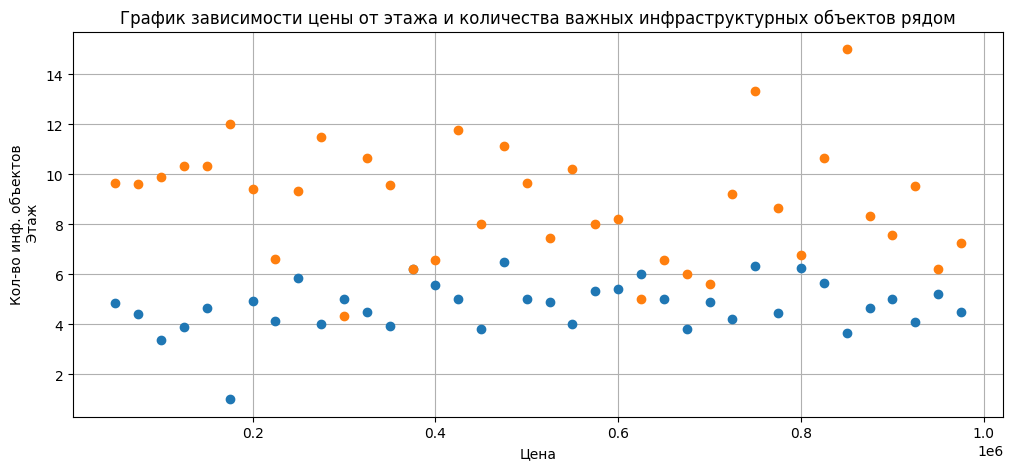

In [28]:
data_1.plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от этажа и количества важных инфраструктурных объектов рядом',legend = False)
plt.xlabel('Цена')
plt.ylabel('Кол-во инф. объектов\n Этаж')
plt.show()
